In [1]:
import numpy as np
import tensorflow as tf
import sys
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os
import moviepy.video.io.ImageSequenceClip
import re

c:\users\vijay\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\vijay\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\vijay\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\vijay\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\frame

In [2]:
from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

In [3]:
def load_inference_graph():

    # load frozen tensorflow model into memory
    
    print("> ====== Loading frozen graph into memory")
    detection_graph = tf.Graph()
    with detection_graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile("object_detection\\frozen_inference_graph.pb", 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
        sess = tf.Session(graph=detection_graph)
    print(">  ====== Inference graph loaded.")
    return detection_graph, sess

In [4]:
def load_inference_graph_mask():

    # load frozen tensorflow model into memory
    
    print("> ====== Loading frozen graph into memory")
    detection_graph = tf.Graph()
    with detection_graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile("object_detection\\Mask_Detection\\frozen_inference_graph.pb", 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
        sess = tf.Session(graph=detection_graph)
    print(">  ====== Inference graph loaded.")
    return detection_graph, sess

In [5]:
def detect_objects(image_np, detection_graph, sess):
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name(
        'detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name(
        'detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name(
        'detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name(
        'num_detections:0')

    image_np_expanded = np.expand_dims(image_np, axis=0)

    (boxes, scores, classes, num) = sess.run(
        [detection_boxes, detection_scores,
            detection_classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})
    return np.squeeze(boxes), np.squeeze(scores), np.squeeze(classes)

In [6]:
detection_graph, sess = load_inference_graph()

> ====== Loading frozen graph into memory
>  ====== Inference graph loaded.


In [7]:
detection_graph_mask, sess_mask = load_inference_graph_mask()

> ====== Loading frozen graph into memory
>  ====== Inference graph loaded.


In [9]:
category_index = label_map_util.create_category_index_from_labelmap("object_detection\\Mask_Detection\\labelmap.pbtxt", use_display_name=True)

In [77]:
video = "C:\\Users\\vijay\\OneDrive\\Pictures\\videoplayback_Trim.mp4"
#capture video
cap = cv2.VideoCapture(video)
cnt=0
# Check if video file is opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
ret,first_frame = cap.read()
#Read until video is completed
while(cap.isOpened()):
    
  # Capture frame-by-frame
  ret, frame = cap.read()
     
  if ret == True:

    #save each frame to folder        
    cv2.imwrite('C:\\Users\\vijay\\Desktop\\Mask detection\\frames\\'+str(cnt)+'.png', frame)
    cnt=cnt+1
    if(cnt==750):
      break

  # Break the loop
  else: 
    break

# Input the frame and start the operation

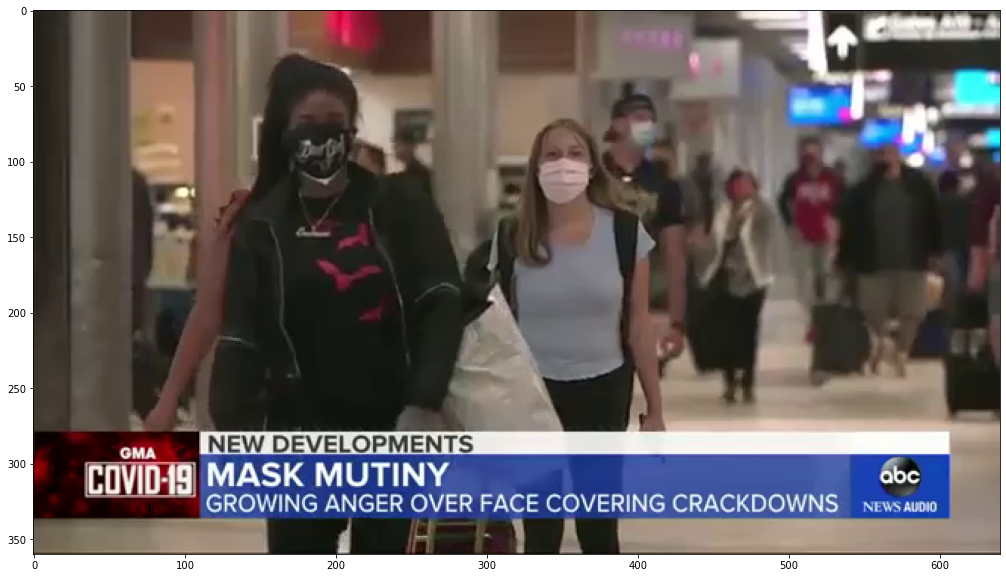

In [11]:
img = cv2.imread("Image\\0.png")
img = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_height, im_width = img.shape[:2]
im_height,im_width
%matplotlib inline
plt.figure(figsize=(20,10))
plt.imshow(img)

In [12]:
boxes, scores, classes = detect_objects(img, detection_graph, sess)

In [13]:
#identity only persons 
ind = np.where((classes==1) & (scores>0.60))
print(ind)
#identify bounding box of only persons
person=boxes[ind]

#total no. of persons
num= len(person)
num

(array([0, 1, 3], dtype=int64),)


3

In [14]:
def midpoint(img,person,idx):
    x1,y1,x2,y2 = person[idx]
    (left, right, top, bottom) = (y1 * im_width, y2 * im_width, 
                              x1 * im_height, x2 * im_height)
    p1 = (int(left), int(top))
    p2 = (int(right), int(bottom))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    _ = cv2.rectangle(img, p1, p2, (0,0,255), 3)
    
    x_center = int((left+right)/2)
    y_center = int(bottom)
    
    center = (x_center, y_center)
    _ = cv2.circle(img, center, 5, (255, 0, 0), -1)
    cv2.putText(img, str(idx), center, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)
    #plt.figure(figsize=(20,10))
    #plt.imshow(img)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return center

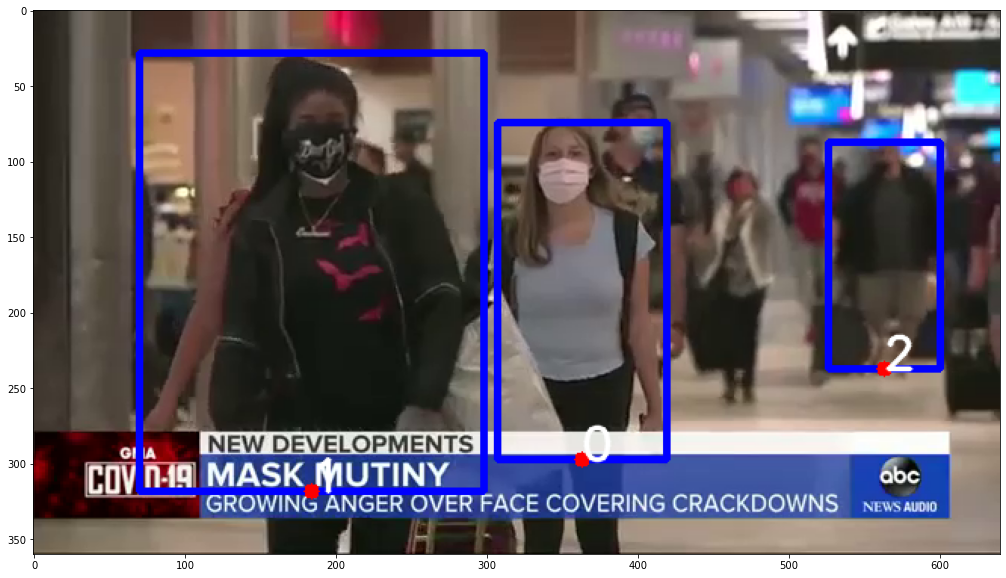

In [15]:
mid_pt =[midpoint(img,person,i) for i in range(len(person))]
plt.figure(figsize=(20,10))
plt.imshow(img)

In [16]:
%%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

Wall time: 327 ms


In [17]:
dist= compute_distance(mid_pt,num)

In [18]:
dist

array([[  0.        , 180.22763384, 208.80613018],
       [  0.        ,   0.        , 387.55902776],
       [  0.        ,   0.        ,   0.        ]])

In [19]:
def find_closest(dist,num,thresh):
    p1=[]
    p2=[]
    d=[]
    for i in range(num):
        for j in range(i,num):
            #print(i,j)
            #print(dist[i][j])
            if( (i!=j) & (dist[i][j]<=thresh)):
                print(i,j)
                p1.append(i)
                p2.append(j)
                d.append(dist[i][j])
    return p1,p2,d    

In [20]:
import pandas as pd

thresh=200
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

0 1


,p1,p2,dist
0,0,1,180.227634


In [21]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  print(risky)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    (left, right, top, bottom) = (y1 * im_width, y2 * im_width, 
                              x1 * im_height, x2 * im_height)
    pp1 = (int(left), int(top))
    pp2 = (int(right), int(bottom))
    #image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    _ =cv2.rectangle(img, pp1, pp2, (255,0,0), 2)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2) 
    #plt.imshow(img)
  return img

[0 1]


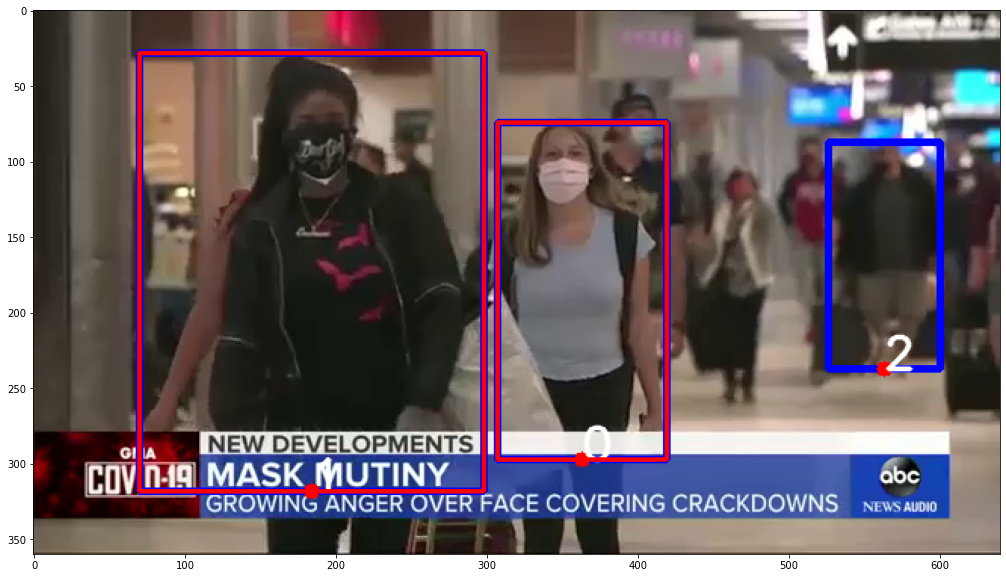

In [22]:
img = change_2_red(img,person,p1,p2)
cv2.imwrite('C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\'+name,cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

%matplotlib inline
plt.figure(figsize=(20,10))
plt.imshow(img)

In [4]:
import os
import re

names=os.listdir('C:\\Users\\vijay\\Desktop\\Mask detection\\frames\\')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [134]:
names

['0.png',
 '1.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png',
 '18.png',
 '19.png',
 '20.png',
 '21.png',
 '22.png',
 '23.png',
 '24.png',
 '25.png',
 '26.png',
 '27.png',
 '28.png',
 '29.png',
 '30.png',
 '31.png',
 '32.png',
 '33.png',
 '34.png',
 '35.png',
 '36.png',
 '37.png',
 '38.png',
 '39.png',
 '40.png',
 '41.png',
 '42.png',
 '43.png',
 '44.png',
 '45.png',
 '46.png',
 '47.png',
 '48.png',
 '49.png',
 '50.png',
 '51.png',
 '52.png',
 '53.png',
 '54.png',
 '288.png',
 '289.png',
 '290.png',
 '291.png',
 '292.png',
 '293.png',
 '294.png',
 '295.png',
 '296.png',
 '297.png',
 '298.png',
 '299.png',
 '300.png',
 '301.png',
 '302.png',
 '303.png',
 '304.png',
 '305.png',
 '306.png',
 '307.png',
 '308.png',
 '309.png',
 '310.png',
 '311.png',
 '312.png',
 '313.png',
 '314.png',
 '315.png',
 '316.png',
 '317.png',
 '318.png']

In [136]:
def find_closest_people(name,thresh):
    img = cv2.imread('C:\\Users\\vijay\\Desktop\\Mask detection\\frames\\'+name)
    #plt.imshow(img)
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.imshow(img)
    im_height, im_width = img.shape[:2]
    boxes, scores, classes = detect_objects(img, detection_graph, sess)
    ind = np.where((classes==1) & (scores>0.60))
    print(ind)
    person=boxes[ind]
    #plt.imshow(img)
    mid_pt =[midpoint(img,person,i) for i in range(len(person))]
    #plt.imshow(img)
    num = len(mid_pt)
    dist= compute_distance(mid_pt,num)
    p1,p2,d=find_closest(dist,num,thresh)
    plt.imshow(img)
    img = change_2_red(img,person,p1,p2)
    #plt.imshow(img)
    cv2.imwrite('C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\'+name,cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return 0
    

In [138]:
from tqdm import tqdm
thresh=200
_ = [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]


  0%|                                                                                           | 0/86 [00:00<?, ?it/s]

(array([0, 1], dtype=int64),)
0 1



  1%|▉                                                                                  | 1/86 [00:00<00:54,  1.55it/s]

[0 1]



  2%|█▉                                                                                 | 2/86 [00:00<00:46,  1.82it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



  3%|██▉                                                                                | 3/86 [00:01<00:41,  2.02it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



  5%|███▊                                                                               | 4/86 [00:01<00:35,  2.30it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



  6%|████▊                                                                              | 5/86 [00:01<00:32,  2.50it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



  7%|█████▊                                                                             | 6/86 [00:02<00:29,  2.70it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



  8%|██████▊                                                                            | 7/86 [00:02<00:29,  2.70it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



  9%|███████▋                                                                           | 8/86 [00:02<00:27,  2.85it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 10%|████████▋                                                                          | 9/86 [00:03<00:25,  2.97it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 12%|█████████▌                                                                        | 10/86 [00:03<00:25,  2.99it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 13%|██████████▍                                                                       | 11/86 [00:03<00:24,  3.06it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 14%|███████████▍                                                                      | 12/86 [00:04<00:23,  3.17it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 15%|████████████▍                                                                     | 13/86 [00:04<00:21,  3.34it/s]

(array([0, 1, 2], dtype=int64),)
0 1
0 2
1 2
[0 1 2]



 16%|█████████████▎                                                                    | 14/86 [00:04<00:21,  3.32it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 17%|██████████████▎                                                                   | 15/86 [00:05<00:24,  2.84it/s]

(array([0, 1], dtype=int64),)
[]



 19%|███████████████▎                                                                  | 16/86 [00:05<00:27,  2.53it/s]

(array([0, 1], dtype=int64),)
[]



 20%|████████████████▏                                                                 | 17/86 [00:06<00:27,  2.53it/s]

(array([0, 1], dtype=int64),)
[]



 21%|█████████████████▏                                                                | 18/86 [00:06<00:28,  2.36it/s]

(array([0, 1], dtype=int64),)
[]



 22%|██████████████████                                                                | 19/86 [00:06<00:26,  2.54it/s]

(array([0, 1, 2], dtype=int64),)
0 2
1 2
[0 1 2]



 23%|███████████████████                                                               | 20/86 [00:07<00:24,  2.66it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 3
1 2
[0 1 2 3]



 24%|████████████████████                                                              | 21/86 [00:07<00:22,  2.84it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 2
0 3
1 2
[0 1 2 3]



 26%|████████████████████▉                                                             | 22/86 [00:07<00:21,  3.00it/s]

(array([0, 1, 2], dtype=int64),)
0 1
1 2
[0 1 2]



 27%|█████████████████████▉                                                            | 23/86 [00:08<00:20,  3.10it/s]

(array([0, 1, 2], dtype=int64),)
0 1
1 2
[0 1 2]



 28%|██████████████████████▉                                                           | 24/86 [00:08<00:20,  3.09it/s]

(array([0, 1, 2], dtype=int64),)
0 1
1 2
[0 1 2]



 29%|███████████████████████▊                                                          | 25/86 [00:08<00:19,  3.14it/s]

(array([0, 1, 2], dtype=int64),)
0 1
1 2
[0 1 2]



 30%|████████████████████████▊                                                         | 26/86 [00:09<00:19,  3.10it/s]

(array([0, 1, 2], dtype=int64),)
0 1
0 2
1 2
[0 1 2]



 31%|█████████████████████████▋                                                        | 27/86 [00:09<00:20,  2.82it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
1 2
1 3
[0 1 2 3]



 33%|██████████████████████████▋                                                       | 28/86 [00:09<00:19,  2.97it/s]

(array([0, 1, 2], dtype=int64),)
0 1
0 2
1 2
[0 1 2]



 34%|███████████████████████████▋                                                      | 29/86 [00:10<00:18,  3.03it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 3
1 2
1 3
[0 1 2 3]



 35%|████████████████████████████▌                                                     | 30/86 [00:10<00:18,  3.08it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 3
1 2
1 3
[0 1 2 3]



 36%|█████████████████████████████▌                                                    | 31/86 [00:10<00:17,  3.10it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
0 3
1 2
[0 1 2 3]



 37%|██████████████████████████████▌                                                   | 32/86 [00:11<00:16,  3.25it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
0 3
1 2
[0 1 2 3]



 38%|███████████████████████████████▍                                                  | 33/86 [00:11<00:17,  3.03it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
1 2
1 3
[0 1 2 3]



 40%|████████████████████████████████▍                                                 | 34/86 [00:11<00:17,  3.01it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
1 2
2 3
[0 1 2 3]



 41%|█████████████████████████████████▎                                                | 35/86 [00:12<00:18,  2.76it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
1 2
2 3
[0 1 2 3]



 42%|██████████████████████████████████▎                                               | 36/86 [00:12<00:19,  2.52it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
1 2
1 3
[0 1 2 3]



 43%|███████████████████████████████████▎                                              | 37/86 [00:12<00:18,  2.66it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
1 2
1 3
[0 1 2 3]



 44%|████████████████████████████████████▏                                             | 38/86 [00:13<00:17,  2.79it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
1 2
1 3
[0 1 2 3]



 45%|█████████████████████████████████████▏                                            | 39/86 [00:13<00:18,  2.61it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
0 3
1 2
[0 1 2 3]



 47%|██████████████████████████████████████▏                                           | 40/86 [00:14<00:17,  2.62it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
0 3
1 2
[0 1 2 3]



 48%|███████████████████████████████████████                                           | 41/86 [00:14<00:16,  2.81it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
0 3
1 2
[0 1 2 3]



 49%|████████████████████████████████████████                                          | 42/86 [00:14<00:16,  2.65it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
0 3
1 2
[0 1 2 3]



 50%|█████████████████████████████████████████                                         | 43/86 [00:15<00:16,  2.54it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 3
1 2
[0 1 2 3]



 51%|█████████████████████████████████████████▉                                        | 44/86 [00:15<00:19,  2.11it/s]

(array([0, 1, 2], dtype=int64),)
0 1
0 2
1 2
[0 1 2]



 52%|██████████████████████████████████████████▉                                       | 45/86 [00:16<00:19,  2.14it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
0 3
1 2
[0 1 2 3]



 53%|███████████████████████████████████████████▊                                      | 46/86 [00:16<00:18,  2.21it/s]

(array([0, 1, 2, 3], dtype=int64),)
0 1
0 2
0 3
1 3
[0 1 2 3]



 55%|████████████████████████████████████████████▊                                     | 47/86 [00:17<00:19,  1.99it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 56%|█████████████████████████████████████████████▊                                    | 48/86 [00:17<00:18,  2.11it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 57%|██████████████████████████████████████████████▋                                   | 49/86 [00:18<00:16,  2.27it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 58%|███████████████████████████████████████████████▋                                  | 50/86 [00:18<00:14,  2.41it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 59%|████████████████████████████████████████████████▋                                 | 51/86 [00:18<00:13,  2.52it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 60%|█████████████████████████████████████████████████▌                                | 52/86 [00:19<00:12,  2.68it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 62%|██████████████████████████████████████████████████▌                               | 53/86 [00:19<00:12,  2.61it/s]

(array([0, 1], dtype=int64),)
0 1
[0 1]



 63%|███████████████████████████████████████████████████▍                              | 54/86 [00:19<00:11,  2.69it/s]

(array([0], dtype=int64),)
[]



 64%|████████████████████████████████████████████████████▍                             | 55/86 [00:20<00:10,  2.87it/s]

(array([0, 1], dtype=int64),)
[]



 65%|█████████████████████████████████████████████████████▍                            | 56/86 [00:20<00:11,  2.63it/s]

(array([0, 1], dtype=int64),)
[]



 66%|██████████████████████████████████████████████████████▎                           | 57/86 [00:21<00:12,  2.31it/s]

(array([0, 1], dtype=int64),)
[]



 67%|███████████████████████████████████████████████████████▎                          | 58/86 [00:21<00:11,  2.49it/s]

(array([0, 1], dtype=int64),)
[]



 69%|████████████████████████████████████████████████████████▎                         | 59/86 [00:22<00:10,  2.50it/s]

(array([0, 1], dtype=int64),)
[]



 70%|█████████████████████████████████████████████████████████▏                        | 60/86 [00:22<00:10,  2.47it/s]

(array([0, 1], dtype=int64),)
[]



 71%|██████████████████████████████████████████████████████████▏                       | 61/86 [00:22<00:09,  2.67it/s]

(array([0, 1], dtype=int64),)
[]



 72%|███████████████████████████████████████████████████████████                       | 62/86 [00:23<00:09,  2.44it/s]

(array([0, 1], dtype=int64),)
[]



 73%|████████████████████████████████████████████████████████████                      | 63/86 [00:23<00:08,  2.75it/s]

(array([0, 1], dtype=int64),)
[]



 74%|█████████████████████████████████████████████████████████████                     | 64/86 [00:23<00:07,  2.85it/s]

(array([0, 1], dtype=int64),)
[]



 76%|█████████████████████████████████████████████████████████████▉                    | 65/86 [00:24<00:06,  3.09it/s]

(array([0, 1], dtype=int64),)
[]



 77%|██████████████████████████████████████████████████████████████▉                   | 66/86 [00:24<00:06,  3.19it/s]

(array([0, 1], dtype=int64),)
[]



 78%|███████████████████████████████████████████████████████████████▉                  | 67/86 [00:24<00:05,  3.17it/s]

(array([0, 1], dtype=int64),)
[]



 79%|████████████████████████████████████████████████████████████████▊                 | 68/86 [00:24<00:05,  3.16it/s]

(array([0, 1], dtype=int64),)
[]



 80%|█████████████████████████████████████████████████████████████████▊                | 69/86 [00:25<00:05,  3.16it/s]

(array([0, 1], dtype=int64),)
[]



 81%|██████████████████████████████████████████████████████████████████▋               | 70/86 [00:25<00:04,  3.28it/s]

(array([0, 1], dtype=int64),)
[]



 83%|███████████████████████████████████████████████████████████████████▋              | 71/86 [00:25<00:04,  3.26it/s]

(array([0, 1], dtype=int64),)
[]



 84%|████████████████████████████████████████████████████████████████████▋             | 72/86 [00:26<00:04,  3.31it/s]

(array([0, 1], dtype=int64),)
[]



 85%|█████████████████████████████████████████████████████████████████████▌            | 73/86 [00:26<00:03,  3.28it/s]

(array([0, 1], dtype=int64),)
[]



 86%|██████████████████████████████████████████████████████████████████████▌           | 74/86 [00:26<00:03,  3.10it/s]

(array([0, 1], dtype=int64),)
[]



 87%|███████████████████████████████████████████████████████████████████████▌          | 75/86 [00:27<00:03,  3.07it/s]

(array([0, 1], dtype=int64),)
[]



 88%|████████████████████████████████████████████████████████████████████████▍         | 76/86 [00:27<00:03,  2.92it/s]

(array([0, 1], dtype=int64),)
[]



 90%|█████████████████████████████████████████████████████████████████████████▍        | 77/86 [00:27<00:03,  2.92it/s]

(array([0, 1], dtype=int64),)
[]



 91%|██████████████████████████████████████████████████████████████████████████▎       | 78/86 [00:28<00:02,  2.91it/s]

(array([0, 1], dtype=int64),)
[]



 92%|███████████████████████████████████████████████████████████████████████████▎      | 79/86 [00:28<00:02,  2.94it/s]

(array([0, 1], dtype=int64),)
[]



 93%|████████████████████████████████████████████████████████████████████████████▎     | 80/86 [00:28<00:02,  2.96it/s]

(array([0, 1], dtype=int64),)
[]



 94%|█████████████████████████████████████████████████████████████████████████████▏    | 81/86 [00:29<00:01,  2.96it/s]

(array([0, 1], dtype=int64),)
[]



 95%|██████████████████████████████████████████████████████████████████████████████▏   | 82/86 [00:29<00:01,  2.97it/s]

(array([0, 1], dtype=int64),)
[]



 97%|███████████████████████████████████████████████████████████████████████████████▏  | 83/86 [00:30<00:01,  2.74it/s]

(array([0, 1], dtype=int64),)
[]



 98%|████████████████████████████████████████████████████████████████████████████████  | 84/86 [00:30<00:00,  2.38it/s]

(array([0, 1, 2], dtype=int64),)
1 2
[1 2]



 99%|█████████████████████████████████████████████████████████████████████████████████ | 85/86 [00:30<00:00,  2.43it/s]

(array([0, 1, 2], dtype=int64),)
0 2
1 2
[0 1 2]



100%|██████████████████████████████████████████████████████████████████████████████████| 86/86 [00:31<00:00,  2.73it/s]

(array([0, 1, 2], dtype=int64),)
1 2
[1 2]


MemoryError: Unable to allocate 900. KiB for an array with shape (360, 640, 4) and data type uint8

<Figure size 432x288 with 1 Axes>

# Mask Detection

In [60]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [68]:
images = os.listdir('C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\')
images.sort(key=lambda f: int(re.sub('\D', '', f)))

In [72]:
image_folder='C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\'
image_files = [image_folder+'/'+img for img in os.listdir(image_folder) if img.endswith(".png")]
image_files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [76]:
image_files

['C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/0.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/1.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/2.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/3.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/4.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/5.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/6.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/7.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/8.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/9.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/10.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/11.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/12.png',
 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/13.png',
 'C:\\Users\\vijay\\Desktop\\M

In [77]:
re.sub('\D', '', 'C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\/0.png')

'0'

In [78]:
for image_path in image_files:
  #image = cv2.imread(image_path)
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = Image.open(image_path)
  fn= re.sub('\D', '', image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  boxes_m, scores_m, classes_m = detect_objects(image, detection_graph_mask, sess_mask)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      np.squeeze(boxes_m),
      np.squeeze(classes_m).astype(np.int32),
      np.squeeze(scores_m),
      category_index,
      use_normalized_coordinates=True,
      line_thickness=8)
  cv2.imwrite('C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\\Mask_update\\'+fn+'.png',cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
  #plt.figure(figsize=IMAGE_SIZE)
  #plt.imshow(image_np)

# Video Creation

In [79]:
image_folder='C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\\Mask_update\\'
fps=10

image_files = [image_folder+'/'+img for img in os.listdir(image_folder) if img.endswith(".png")]
image_files.sort(key=lambda f: int(re.sub('\D', '', f)))
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('C:\\Users\\vijay\\Desktop\\Mask detection\\frames_update\\\Mask_update\\sample_output.mp4')

Moviepy - Building video C:\Users\vijay\Desktop\Mask detection\frames_update\\Mask_update\sample_output.mp4.
Moviepy - Writing video C:\Users\vijay\Desktop\Mask detection\frames_update\\Mask_update\sample_output.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\vijay\Desktop\Mask detection\frames_update\\Mask_update\sample_output.mp4
